In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit

Characterizing An Unknown Component Manually
----------------------------------------------------------

Suppose you were given a new electronic component with two wires and you were asked
to measure its behavior. How would you do it? You might consider a circuit like this:

![Unknown](imgs/unknown.png)

You could monitor the current with an idea current meter, and set the voltage with an ideal voltate supply.

Unfortunately you'd probably relaize that we don't have any ideal current meters handy, (though we do have very nearly ideal voltage sources!). How could we measure the current accurately without putting a current meter inline with the component? After a bit of thought you might come up with this idea:

![Unknows_wR](imgs/unknown_wR.png)

How does that help? Note that if you *know* the resistance of the resistor, and you can *measure* the voltage at either end of that resistor, you can use Ohm's law to deduce the current flow! Easy! OK, so let's do it. You can go to [tinkercad](https://tinkercad.com) and create a circuit like this:

![Tinker](imgs/tinker.png)

Note that you can adjust the voltage knob on the power supply and the voltages measured by the two voltmeters change. Also, while this particular supply displays the current, you could compute the current using the voltage measurements and the resitance of the resistor (300 $\Omega$).

The current, in this case, is $I = (2.80\ {\rm V} - 1.89\ {\rm V})/300\ \Omega \approx 3.03\ {\rm mA}$.

If you adjust the voltage of the source over a range of values you'll get a table of readings like this (Vd is in Volts, Id is in mA):


In [3]:
diode_df = pd.read_csv('diodeData.csv')
diode_df

,Vd,Id
0,1.74,0.192
1,1.80,0.659
2,1.83,1.220
3,1.86,1.810
4,1.87,2.420
5,1.89,3.040
6,1.90,3.670
7,1.91,4.300
8,1.92,4.930
9,1.93,5.560


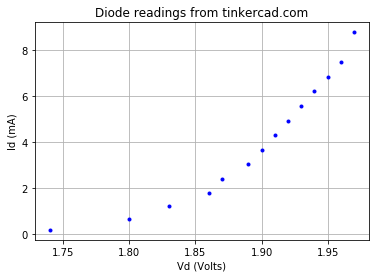

In [5]:
pl.plot(diode_df.Vd.values, diode_df.Id.values,'b.')
pl.title("Diode readings from tinkercad.com")
pl.xlabel("Vd (Volts)")
pl.ylabel("Id (mA)")
pl.grid()

We could perform the same analysis using LTSpice:

![LTSpice LED](imgs/LTSpiceLED.png)

In [17]:
LTSpiceDiodeData_df = pd.read_csv('Draft29.txt', sep='\t')
LTSpiceDiodeData_df

,v1,V(vd)
0,0.0,0.000000
1,0.1,0.100000
2,0.2,0.200000
3,0.3,0.300000
4,0.4,0.399999
5,0.5,0.499999
6,0.6,0.599997
7,0.7,0.699994
8,0.8,0.799986
9,0.9,0.899971


Text(0.5, 1.0, 'LTSpice Results')

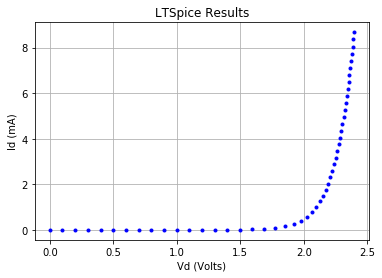

In [19]:
V1 = LTSpiceDiodeData_df.v1.values
Vd = LTSpiceDiodeData_df['V(vd)'].values
Id = 1000*(V1 - Vd)/300 # compute current (v1 - vd)/(300 ohms)
pl.plot(Vd, Id, 'b.')
pl.grid()
pl.xlabel("Vd (Volts)")
pl.ylabel("Id (mA)")
pl.title("LTSpice Results")